<a href="https://colab.research.google.com/github/kellykryoung/AI_Study/blob/main/webcrawling/00_WebCrawling_newstitles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2023/5/8
# naver news 에서 '삼성전자' 기사 뉴스제목 크롤링
# naver news 에서 '삼성전자' 연관 검색어 크롤링

In [ ]:
# WebCrawling 2 stages
# 1. get : 웹 내용 가져오고
# 2. select : 태그안 내용들 가져오고

In [2]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# 1. get
# requests.get(url)
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=40&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=21'
requests_url = requests.get(url)
requests_url

In [ ]:
requests_url.content # html

In [6]:
# 2. select
# html.select
# html = requests_url.content
soup = BeautifulSoup(requests_url.content, 'lxml') # typed to BS
# check soup
soup        # lxml type

'뉴스제목과 url 크롤링'

In [ ]:
# [<a class='news_tit" herf=" url" >]
a_tags = soup.select('a.news_tit')
a_tags

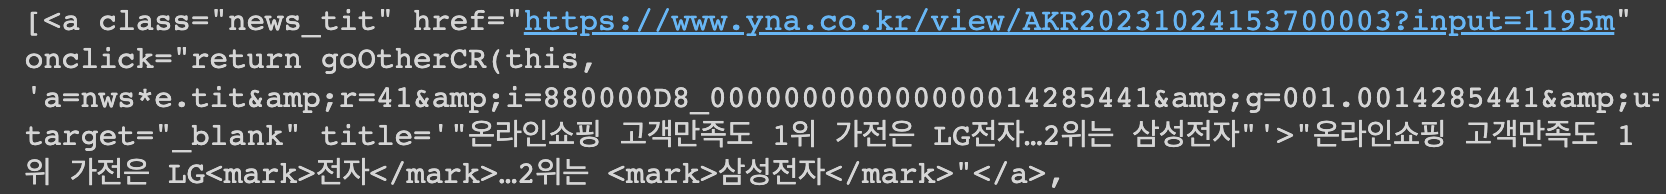

In [ ]:
# dic = {'title': 'news content'}

titles, urls = [],[]
for a_tag in a_tags:
    titles.append(a_tag['title'])
    urls.append(a_tag['href'])

news_info = {'제목': titles, '링크': urls}
news_info

In [ ]:
# 3. dataframe
import pandas as pd
df_news = pd.DataFrame(news_info)
df_news.to_csv('삼성전자_기사정보(2023.5.8).csv', encoding = 'utf-8-sig', index = False)


'연관 검색어 크롤링'

In [ ]:
url ='https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EB%B6%80%EC%82%B0%EC%97%91%EC%8A%A4%ED%8F%AC&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=32&mynews=0&office_type=0&office_section_code=0&news_office_checked=&office_category=0&service_area=0&nso=so:r,p:all,a:all&start=51'
resp = requests.get(url)
resp

In [ ]:
soup = BeautifulSoup(resp.content, 'lxml')
                # select 문구 : space ' ' = 상위 태그와 하위 태그의 구분자
key_tags = soup.select('ul.lst_related_src div.tit')
len(key_tags)

In [ ]:
for key_tag in key_tags:
    print(key_tag.text) # 시작태그와 끝태그 사이에 있는 text만 가져옴